<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Initialization with Same Weights </h1>

<h2>Table of Contents</h2>
<p>In this lab, we will see the problem of initializing the weights with the same value. We will see that even for a simple network, our model will not train properly. .</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network with Same Weights Initialization define  Criterion Function, Optimizer, and Train the Model</a></li>
    <li><a href="#Train">Define the Neural Network with defult Weights Initialization define  Criterion Function, Optimizer, and Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries

In [2]:
# Import the libraries we need for this lab

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

Used for plotting the model

In [3]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 

In [4]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

Define the training function:

In [5]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2>

In [6]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

<!--Empty Space for separating topics-->

<h2 id="Train">Define the Neural Network with Same Weights Initialization define, Criterion Function, Optimizer and Train the Model</h2>

Create the Cross-Entropy loss function: 

In [7]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define the Neural Network

In [8]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)


This is the PyTorch default installation

In [9]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0075],
                      [ 0.5364]])),
             ('linear1.bias', tensor([-0.8230, -0.7359])),
             ('linear2.weight', tensor([[-0.2723,  0.1896]])),
             ('linear2.bias', tensor([-0.0140]))])

Same Weights Initialization with all ones for weights and zeros for the bias.

In [10]:
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

Optimizer, and Train the Model:

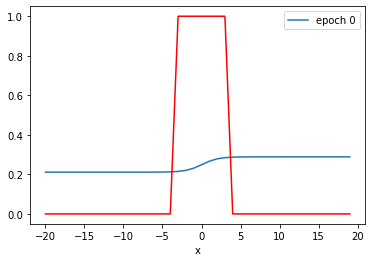

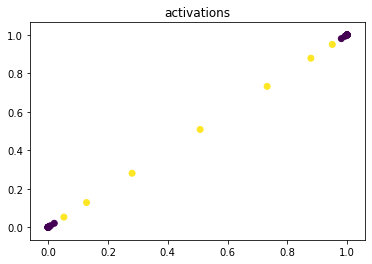

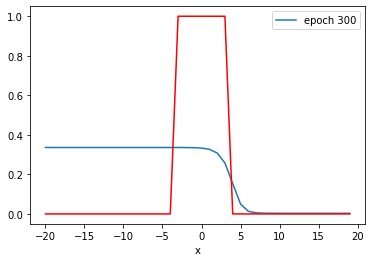

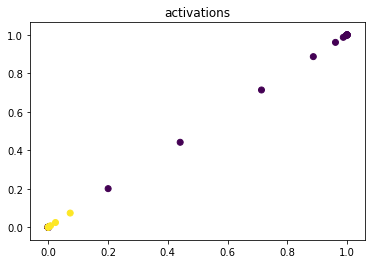

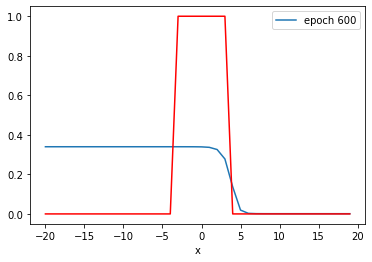

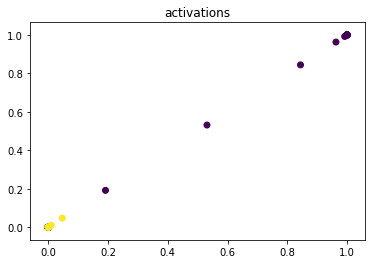

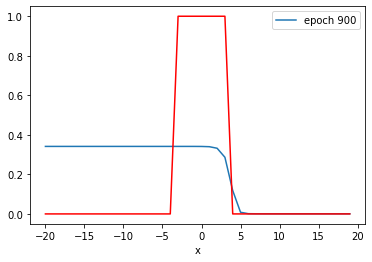

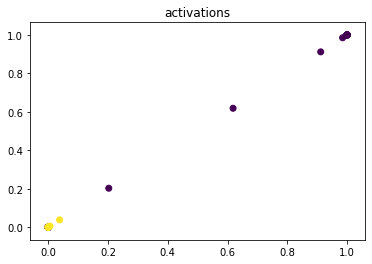

Text(0.5, 1.0, 'cross entropy loss')

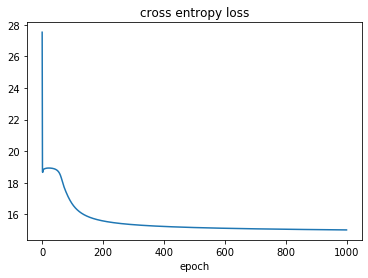

In [11]:
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  paramters all thought they have changed they are identical.

In [12]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.9340],
                      [1.9340]])),
             ('linear1.bias', tensor([-9.0725, -9.0725])),
             ('linear2.weight', tensor([[-3.3976, -3.3976]])),
             ('linear2.bias', tensor([-0.6546]))])

In [13]:
yhat=model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

tensor([[0.3420],
        [0.3418],
        [0.3337]], grad_fn=<SigmoidBackward>)

<h2 id="Train2">Define the Neural Network, Criterion Function, Optimizer and Train the Model </h2>

In [14]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)

Repeat the previous steps above by using the MSE cost or total loss: 


In [ ]:
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')
criterion_mse=nn.MSELoss()
model=Net(D_in,H,D_out)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_mse=train(Y,X,model,optimizer,criterion_mse,epochs=1000)
plt.plot(cost_mse)
plt.xlabel('epoch')
plt.title('MSE loss ')

Double-click <b>here</b> for the solution.

<!-- 
learning_rate = 0.1
criterion_mse=nn.MSELoss()
model=Net(D_in,H,D_out)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_mse=train(Y,X,model,optimizer,criterion_mse,epochs=1000)
plt.plot(cost_mse)
plt.xlabel('epoch')
plt.title('MSE loss ')
-->

<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.